# Chapter: Input-Output Modeling - Part 1: 


## Topic: Fitting FIR model and generating step response curves

In [1]:
# import packages 
import matplotlib.pyplot as plt, numpy as np
from sklearn.preprocessing import StandardScaler
from sippy import system_identification as SysID
import control

# package settings
plt.rcParams.update({'font.size': 14})
assert(control.__version__ < '0.9'), "To avoid errors, downgrade the control package to a version < 0.9.0. See https://github.com/CPCLAB-UNIPI/SIPPY/issues/48 for details."

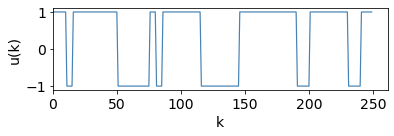

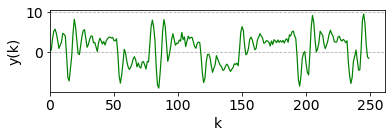

In [4]:
# read data and plot
data = np.loadtxt('FIR_illustrate.csv', delimiter=',')
u = data[:,0, None]; y = data[:,1, None]

# plots
plt.figure(figsize=(6,1.5))
plt.plot(u, 'steelblue', linewidth=1.2)
plt.ylabel('u(k)'), plt.xlabel('k'), plt.xlim(0)

plt.figure(figsize=(6,1.5))
plt.plot(y, 'g', linewidth=1.2)
plt.ylabel('y(k)'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

In [5]:
# center data before model fitting
u_scaler = StandardScaler(with_std=False) 
u_centered = u_scaler.fit_transform(u) 

y_scaler = StandardScaler(with_std=False) 
y_centered = y_scaler.fit_transform(y) 

In [6]:
# fit FIR model
model_order = 30 # 3,30,60
FIRmodel = SysID(y_centered, u_centered, 'FIR', FIR_orders=[model_order,0])

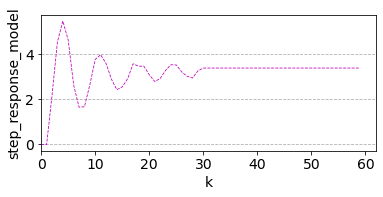

In [7]:
# generate  step response of FIR model
step_response_model, _ = control.matlab.step(FIRmodel.G, T=60)

plt.figure(figsize=(6,2.5))
plt.plot(step_response_model, 'm--', linewidth=0.8)
plt.ylabel('step_response_model'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

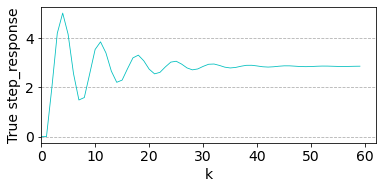

In [8]:
# generate step response of original process
# define the original process
DEN_G = [1, -1.1, 0.8] # corresponding to q^2 -1.1q^-1 + 0.8
NUM_G = [2]
sys_G = control.matlab.tf(NUM_G, DEN_G, 1)

# get step response
step_response_process, T = control.matlab.step(sys_G, T=60)

plt.figure(figsize=(6,2.5))
plt.plot(step_response_process, 'c', linewidth=0.8)
plt.ylabel('True step_response'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

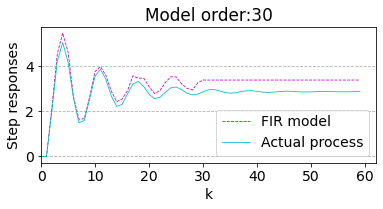

In [9]:
# overlay the step responses
plt.figure(figsize=(6,2.5))
plt.plot(step_response_model, 'm--', linewidth=0.8, label="FIR model")
plt.plot(step_response_process, 'c', linewidth=0.8, label="Actual process")
plt.ylabel('Step responses'), plt.xlabel('k'), plt.xlim(0)
plt.title('Model order:' + str(model_order))
plt.legend()
plt.grid(which='both', axis='y', linestyle='--')
plt.show()